# SHARKY PROJECT!
--------------------------------

## Objective

In this project we are going to take a look at the Shark attack data base from http://www.sharkattackfile.net.
Specifically, I want to investigate daily differences in shark behavior. Are sharks more 'aggresive' during the night?  

## Importing dependencies and reading the data 

In [1]:
import pandas as pd
import numpy as np
import cleaning_functions as fn
import countryinfo as cn

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv('../attacks.csv', encoding='latin-1')

## Exploring the data

* Let's take a look at the structure of the data

In [3]:
print(df.shape)
print(df.columns)
df

(25723, 24)
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A number of columns will be of no use for this analysis. I will get rid of those in order to simplify the data. <br>

Likewise, it looks like the tail of the data frame is composed of empty entries that will be removed as well.<br>


In [4]:
df.describe(include='all')

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
count,8702,6302,6300.000000,6298,6252,5847,5762,5758,6092,5737,...,3464,6285,6302,6301,6302,6302,6302,6309.000000,1,2
unique,6287,5433,NaN,8,212,825,4108,1532,5230,6,...,1549,4969,6291,6290,6285,6285,6286,NaN,1,2
top,0,1957,NaN,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,White shark,"C. Moore, GSAF",1923.00.00.a-NJ fisherman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1913.08.27.R,2009.12.18,NaN,stopped here,change filename
freq,2400,11,NaN,4595,2229,1037,163,971,550,5094,...,163,105,2,2,4,2,2,NaN,1,1
mean,NaN,NaN,1927.272381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3155.999683,NaN,NaN
std,NaN,NaN,281.116308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1821.396206,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
25%,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1579.000000,NaN,NaN
50%,NaN,NaN,1977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3156.000000,NaN,NaN
75%,NaN,NaN,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4733.000000,NaN,NaN


* Let's take a closer look at those columns of interest:<br>

Provoked attacks or attacks arising from specific causes can trigger somehow unnatural responses in sharks. Therefore, I am interested in reported 'Unprovoked' attacks

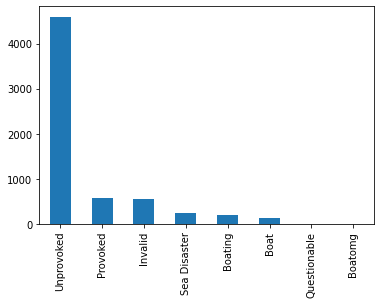

In [5]:
%matplotlib inline
df.Type.value_counts().plot.bar()

Most of the data consist of 'Unprovoked' attacks. That's good.<br>
However, the time column is a complete mess, that's not good:

In [6]:
#First instances of Time
df.Time.unique()[:50]

array(['18h00', '14h00  -15h00', '07h45', nan, 'Late afternoon', '17h00',
       '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30', '10h40',
       '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40', '08h00',
       '17h35', '15h30', '07h30', '19h00, Dusk', 'Night', '16h00',
       '15h01', '12h00', '13h45', '23h30', '09h00', '14h30', '18h30',
       '12h30', '16h30', '18h45', '06h00', '10h00', '10h44', '13h19',
       'Midday', '13h30', '10h45', '11h20', '11h45', '19h30', '08h30',
       '15h45', 'Shortly before 12h00', '17h34'], dtype=object)

Other columns of interest will be the kind of activity that the person was doing and whether or not the attack resulted in a casualty. Let's explore those variables:

In [7]:
print(len(df.Activity.unique()))
df.Activity.value_counts()

1533


Surfing                                                                                                      971
Swimming                                                                                                     869
Fishing                                                                                                      431
Spearfishing                                                                                                 333
Bathing                                                                                                      162
                                                                                                            ... 
The 240-ton motor vessel Pilar II with 100 people on board capsized in high winds & rough seas                 1
Fishing boat with 4 men on board was rammed & capsized by  a shark, throwing all occupants into the water      1
Snorkeling (filming the sardine run)                                                            

Although most of the observations fall within five categories, there is quite some work to do on this column...


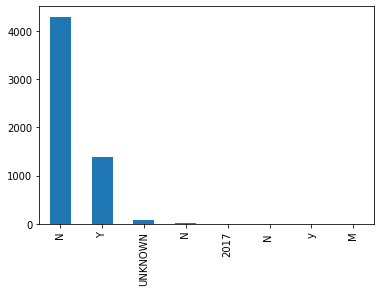

In [8]:
df['Fatal (Y/N)'].value_counts().plot.bar()

Not bad, this one, most of the observations are correctly labeled...

## Removal of excess of columns and rows

In [9]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [10]:
useful_columns = ['Date', 'Year','Type', 'Country','Area','Activity','Sex ','Fatal (Y/N)', 'Time','Species ']

df_clean = df[useful_columns]

#Lets create an id column that might be useful in the future
df_clean['id'] = list(range(len(df_clean)))

print(df.shape)
df_clean.head()

(25723, 24)


,Date,Year,Type,Country,Area,Activity,Sex,Fatal (Y/N),Time,Species,id
0,25-Jun-2018,2018.0,Boating,USA,California,Paddling,F,N,18h00,White shark,0
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,Standing,F,N,14h00 -15h00,NaN,1
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,Surfing,M,N,07h45,NaN,2
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,M,N,NaN,2 m shark,3
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,Free diving,M,N,NaN,"Tiger shark, 3m",4


Let's now subset for the attacks that were reported unprovoked:

In [11]:
df_unpr = df_clean[df_clean.Type=='Unprovoked']

f"I got rid of {len(df_clean) - len(df_unpr)} observations"

'I got rid of 21128 observations'

Unfortunatelly, many more of the observations have NaN in the Time column:

In [12]:
df_unpr[df_unpr.Time.isnull()]

,Date,Year,Type,Country,Area,Activity,Sex,Fatal (Y/N),Time,Species,id
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Surfing,M,N,NaN,2 m shark,3
5,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Kite surfing,M,N,NaN,NaN,5
7,27-May-2018,2018.0,Unprovoked,USA,Florida,Fishing,M,N,NaN,"Lemon shark, 3'",7
11,21-May-2018,2018.0,Unprovoked,USA,South Carolina,Boogie boarding,M,N,NaN,NaN,11
17,Reported 30-Apr-2018,2018.0,Unprovoked,THAILAND,Hua Hin,Swimming,M,N,NaN,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Diving,M,Y,NaN,NaN,6297
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Pearl diving,M,Y,NaN,NaN,6298
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Swimming,M,Y,NaN,NaN,6299
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,NaN,M,Y,NaN,NaN,6300


In [13]:
# Delete rows with null times:
data = df_unpr[~df_unpr.Time.isnull()]

We can see that, at least the columns of interest, are empty of null values: 

In [14]:
data.isnull().sum()

Date             0
Year             0
Type             0
Country          3
Area            49
Activity        45
Sex             24
Fatal (Y/N)      0
Time             0
Species        947
id               0
dtype: int64

## Fixing column's values

First, I will use the custom fixcolnames function to get rid of spaces and uppercases in the columns names so it is easier to access to them:    

In [15]:
data.columns = fn.fixcolnames(data.columns)
data

,date,year,type,country,area,activity,sex,fatal,time,species,id
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,Standing,F,N,14h00 -15h00,NaN,1
6,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,Swimming,M,Y,Late afternoon,Tiger shark,6
8,26-May-2018,2018.0,Unprovoked,USA,Florida,Walking,M,N,17h00,"Bull shark, 6'",8
9,26-May-2018,2018.0,Unprovoked,USA,Florida,Standing,M,N,14h00,NaN,9
12,13-May-2018,2018.0,Unprovoked,USA,South Carolina,Swimming,M,N,15h00,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...
6228,"No date, Before 1969",0.0,Unprovoked,RED SEA?,NaN,Free diving,F,N,Morning,NaN,6228
6241,1960s,0.0,Unprovoked,IRAQ,Basrah,Fishing from a small boat & put his hand in th...,M,N,Afternoon,NaN,6241
6242,1960s,0.0,Unprovoked,IRAQ,Basrah,Swimming naked near a date palm where many dat...,M,N,Afternoon,Bull shark,6242
6243,1960s,0.0,Unprovoked,IRAQ,Basrah,Swimming in section of river used for washing ...,M,N,Afternoon,Bull shark,6243


In [16]:
#Use the custom function fixtime on time
data['time'] = fn.fixtime(data.time)

#Create new column by using the timeclassify custom function:
data['night_day'] = fn.timeclassify(data.time)

#Let's check those that didn't return a valid value
data[data['night_day'].isnull()][['time', 'night_day']]


,time,night_day
958,AM,None
979,A.M.,None
1730,--,None
1790,--,None
1797,--,None
1826,,None
1855,,None
2177,P.M.,None
2186,2 hours after Opperman,None
2517,A.M.,None


AM and PM are quite ambiguous, both can be night or day. There are some missing values, but there is one misspelling in 'Late afternon' that I can fix manually and then remove the rows where time is null:

In [17]:
data.loc[data.time == 'Late afternon','night_day'] = 'Day'
data = data[~data.night_day.isnull()]

In [18]:
data.isnull().sum()

date           0
year           0
type           0
country        2
area          49
activity      45
sex           24
fatal          0
time           0
species      932
id             0
night_day      0
dtype: int64